## Vergleich von Gesamtdatensatz und annotiertem Datensatz

--> um herauszufinden, ob annotierte Daten repräsentativ sind

In [1]:
import pandas as pd

df_gesamt = pd.read_excel("df_de.xlsx")
df_annotiert = pd.read_excel("tweets_annotiert.xlsx")

In [2]:
df_gesamt = df_gesamt[['tweet_date_create','tweet_creator_atName','tweet_creator_screenName','tweet_creator_bio','tweet_text','retweet_text_retweeted_tweet','zitat_text']]

In [3]:
df_gesamt.shape

(81429, 7)

In [4]:
df_annotiert.shape

(25714, 10)

#### Create Date

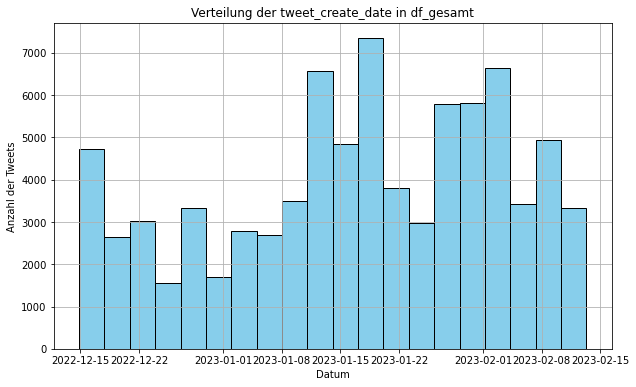

In [5]:
import matplotlib.pyplot as plt

df_gesamt['tweet_date_create'] = pd.to_datetime(df_gesamt['tweet_date_create'])

# Verteilung der Daten visualisieren
plt.figure(figsize=(10, 6))
df_gesamt['tweet_date_create'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Verteilung der tweet_create_date in df_gesamt')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Tweets')
plt.show()

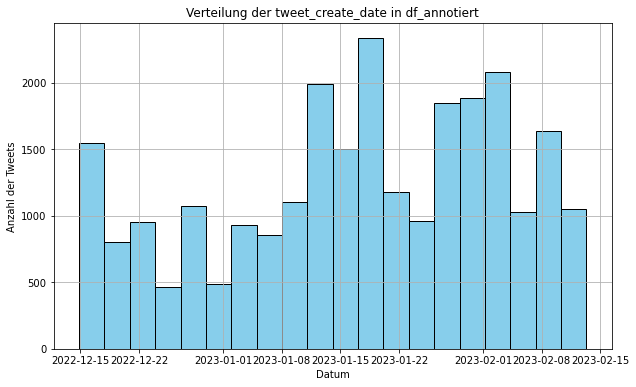

In [6]:
import matplotlib.pyplot as plt

df_annotiert['tweet_date_create'] = pd.to_datetime(df_annotiert['tweet_date_create'])

# Verteilung der Daten visualisieren
plt.figure(figsize=(10, 6))
df_annotiert['tweet_date_create'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Verteilung der tweet_create_date in df_annotiert')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Tweets')
plt.show()

#### Bios

In [7]:
df_gesamt['tweet_creator_bio'] = df_gesamt['tweet_creator_bio'].astype(str)
df_annotiert['tweet_creator_bio'] = df_annotiert['tweet_creator_bio'].astype(str)

In [8]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
# Tokenisierung und Durchschnittliche Wortanzahl
def average_word_length(text):
    words = word_tokenize(text)
    return sum(len(word) for word in words) / len(words) if len(words) > 0 else 0

In [10]:
average_word_count_df1 = df_gesamt['tweet_creator_bio'].apply(lambda x: len(word_tokenize(x)))
average_word_count_df2 = df_annotiert['tweet_creator_bio'].apply(lambda x: len(word_tokenize(x)))

print(f"Durchschnittliche Wortanzahl in Gesamtdatensatz: {average_word_count_df1.mean():.2f}")
print(f"Durchschnittliche Wortanzahl in annotiertem Datensatz: {average_word_count_df2.mean():.2f}")

Durchschnittliche Wortanzahl in Gesamtdatensatz: 14.96
Durchschnittliche Wortanzahl in annotiertem Datensatz: 14.92


In [11]:
# Häufigste Wörter
def most_frequent_words(column_names, dataframe):
    # Kombinieren aller Texte aus den ausgewählten Spalten zu einem einzelnen Text
    combined_text = ''
    for column_name in column_names:
        combined_text += ' '.join(dataframe[column_name]) + ' '
        
    # Ersetzen des Musters '-998' und '-900'
    cleaned_text = combined_text.replace('-998', '')
    cleaned_text = cleaned_text.replace('-900', '')
    
     # Entfernen aller Zeichen (nicht Buchstaben und Zahlen)
    cleaned_text = ''.join(e for e in cleaned_text if e.isalnum() or e.isspace())
    
    # Tokenisierung des Textes (in Wörter aufteilen)
    words = cleaned_text.split()
    
    # Erzeugen einer Liste von Stoppwörtern
    stop_words = set(stopwords.words('german')) 
    
    # Entfernen von Stoppwörtern
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Ermitteln der häufigsten Wörter
    word_counts = Counter(filtered_words)
    
    # Die 'top_n' häufigsten Wörter auswählen
    top_words = word_counts.most_common(30)
    
    return top_words

In [12]:
most_common_words_df_gesamt = most_frequent_words(df_gesamt[['tweet_creator_bio']], df_gesamt)
most_common_words_df_annotiert = most_frequent_words(df_annotiert[['tweet_creator_bio']], df_annotiert)

In [13]:
data = {'Gesamt': most_common_words_df_gesamt, 'Annotiert': most_common_words_df_annotiert}
most_common_table  = pd.DataFrame(data)

In [14]:
most_common_table

,Gesamt,Annotiert
0,"(nan, 14250)","(nan, 4501)"
1,"(and, 6091)","(and, 1855)"
2,"(of, 5802)","(of, 1698)"
3,"(the, 4956)","(the, 1665)"
4,"(MECFS, 3445)","(MECFS, 1384)"
5,"(IT, 2978)","(to, 887)"
6,"(a, 2788)","(I, 832)"
7,"(to, 2692)","(for, 819)"
8,"(for, 2587)","(a, 777)"
9,"(I, 2290)","(my, 628)"


#### Verhältnis Tweets - Retweets - Zitierte Tweets

In [15]:
def count_tweet_type(df):
    # Zählen der Zeilen, in denen Spalte tweet_text nicht den Wert -998 enthält
    count_tweets = ((df['tweet_text'] != '-998') & (df['retweet_text_retweeted_tweet'] == '-998') & (df['zitat_text'] == '-998')).sum()

    # Zählen der Zeilen, in denen Spalte retweet_text_retweeted_tweet nicht den Wert -998 enthält
    count_retweets = (df['retweet_text_retweeted_tweet'] != '-998').sum()

    # Zählen der Zeilen, in denen Spalte zitat_text nicht den Wert -998 enthält
    count_zitat = (df['zitat_text'] != '-998').sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [16]:
# Gesamter Datensatz
print("Im gesamten Datensatz:")
count_tweet_type(df_gesamt)

Im gesamten Datensatz:
Anzahl Tweets: 27748 (34.08% der Gesamtanzahl)
Anzahl Retweets: 47429 (58.25% der Gesamtanzahl)
Anzahl zitierte Tweets: 16618 (20.41% der Gesamtanzahl)


In [17]:
# Annotierter Datensatz
print("Im annotierten Datensatz:")
count_tweet_type(df_annotiert)

Im annotierten Datensatz:
Anzahl Tweets: 8422 (32.75% der Gesamtanzahl)
Anzahl Retweets: 15238 (59.26% der Gesamtanzahl)
Anzahl zitierte Tweets: 5344 (20.78% der Gesamtanzahl)


#### Tweets

In [18]:
df_gesamt['tweet_text'] = df_gesamt['tweet_text'].astype(str)
df_annotiert['tweet_text'] = df_annotiert['tweet_text'].astype(str)
df_gesamt['retweet_text_retweeted_tweet'] = df_gesamt['retweet_text_retweeted_tweet'].astype(str)
df_annotiert['retweet_text_retweeted_tweet'] = df_annotiert['retweet_text_retweeted_tweet'].astype(str)
df_gesamt['zitat_text'] = df_gesamt['zitat_text'].astype(str)
df_annotiert['zitat_text'] = df_annotiert['zitat_text'].astype(str)

In [19]:
most_common_words_df_gesamt = most_frequent_words(df_gesamt[['tweet_text','retweet_text_retweeted_tweet','zitat_text']], df_gesamt)
most_common_words_df_annotiert = most_frequent_words(df_annotiert[['tweet_text','retweet_text_retweeted_tweet','zitat_text']], df_annotiert)
data = {'Gesamt': most_common_words_df_gesamt, 'Annotiert': most_common_words_df_annotiert}
most_common_table  = pd.DataFrame(data)
most_common_table

,Gesamt,Annotiert
0,"(Forschung, 66408)","(Forschung, 20785)"
1,"(mehr, 9347)","(mehr, 3160)"
2,"(MECFS, 8275)","(MECFS, 2519)"
3,"(Wissenschaft, 6830)","(geht, 1932)"
4,"(geht, 5695)","(LongCovid, 1835)"
5,"(2023, 5505)","(gibt, 1786)"
6,"(LongCovid, 5494)","(Menschen, 1692)"
7,"(gibt, 5349)","(Wissenschaft, 1569)"
8,"(Menschen, 5205)","(Lehre, 1438)"
9,"(Lehre, 4989)","(2023, 1337)"


In [20]:
# Tweet Text
average_word_count_df1 = df_gesamt['tweet_text'].apply(lambda x: len(word_tokenize(x)))
average_word_count_df2 = df_annotiert['tweet_text'].apply(lambda x: len(word_tokenize(x)))

print(f"Durchschnittliche Wortanzahl in Gesamtdatensatz: {average_word_count_df1.mean():.2f}")
print(f"Durchschnittliche Wortanzahl in annotiertem Datensatz: {average_word_count_df2.mean():.2f}")

Durchschnittliche Wortanzahl in Gesamtdatensatz: 14.49
Durchschnittliche Wortanzahl in annotiertem Datensatz: 14.03


In [21]:
# Retweet Text
average_word_count_df1 = df_gesamt['retweet_text_retweeted_tweet'].apply(lambda x: len(word_tokenize(x)))
average_word_count_df2 = df_annotiert['retweet_text_retweeted_tweet'].apply(lambda x: len(word_tokenize(x)))

print(f"Durchschnittliche Wortanzahl in Gesamtdatensatz: {average_word_count_df1.mean():.2f}")
print(f"Durchschnittliche Wortanzahl in annotiertem Datensatz: {average_word_count_df2.mean():.2f}")

Durchschnittliche Wortanzahl in Gesamtdatensatz: 22.45
Durchschnittliche Wortanzahl in annotiertem Datensatz: 22.88


In [22]:
# Zitat Text
average_word_count_df1 = df_gesamt['zitat_text'].apply(lambda x: len(word_tokenize(x)))
average_word_count_df2 = df_annotiert['zitat_text'].apply(lambda x: len(word_tokenize(x)))

print(f"Durchschnittliche Wortanzahl in Gesamtdatensatz: {average_word_count_df1.mean():.2f}")
print(f"Durchschnittliche Wortanzahl in annotiertem Datensatz: {average_word_count_df2.mean():.2f}")

Durchschnittliche Wortanzahl in Gesamtdatensatz: 8.65
Durchschnittliche Wortanzahl in annotiertem Datensatz: 8.80
